In [1]:
# %matplotlib
# %matplotlib inline
import numpy
import matplotlib.pyplot as plt
import time

In [2]:
import sys
import os
sys.path.append(os.path.abspath(os.path.join(os.getcwd(), os.pardir)))
print(sys.path)

['', 'C:\\Users\\seanm\\Anaconda3\\python35.zip', 'C:\\Users\\seanm\\Anaconda3\\DLLs', 'C:\\Users\\seanm\\Anaconda3\\lib', 'C:\\Users\\seanm\\Anaconda3', 'C:\\Users\\seanm\\Anaconda3\\lib\\site-packages', 'C:\\Users\\seanm\\Anaconda3\\lib\\site-packages\\win32', 'C:\\Users\\seanm\\Anaconda3\\lib\\site-packages\\win32\\lib', 'C:\\Users\\seanm\\Anaconda3\\lib\\site-packages\\Pythonwin', 'C:\\Users\\seanm\\Anaconda3\\lib\\site-packages\\IPython\\extensions', 'C:\\Users\\seanm\\.ipython', 'C:\\Users\\seanm\\OneDrive\\Documents\\Research\\TauHybridSolver\\GillesPy2']


In [10]:
import math
import gillespy2
from gillespy2.basic_tau_hybrid_solver import BasicTauHybridSolver
from gillespy2.basic_ssa_solver import BasicSSASolver
from gillespy2.basic_tau_leaping_solver import BasicTauLeapingSolver

In [11]:
class SimpleHybridModel(gillespy2.Model):
     def __init__(self, parameter_values=None, init_v=1):
            #initialize Model
            gillespy2.Model.__init__(self, name="Simple_Hybrid_Model")

            
            #Species
            A = gillespy2.Species(name='A', initial_value=init_v)
            V = gillespy2.Species(name='V', initial_value=init_v)

            self.add_species([A, V])
            
            #parameters
            rate1 = gillespy2.Parameter(name='rate1', expression= 20.0)
            rate2 = gillespy2.Parameter(name='rate2', expression= 10.0)
#             rate_rule1 = gillespy2.RateRule(V, "cos(t)")
            self.add_parameter([rate1, rate2])
#             self.add_rate_rule(rate_rule1)
            
            #reactions
            r1 = gillespy2.Reaction(name="r1",reactants={}, products={A:1},
                   propensity_function="rate1 * V")
            
            r2 = gillespy2.Reaction(name="r2",reactants={A:1}, products={},
                    rate=rate2)
            
            self.add_reaction([r1,r2])
            self.timespan(numpy.linspace(0,100, 101))

In [12]:
model = SimpleHybridModel(init_v=170)

In [13]:
%time results1 = model.run(solver=BasicSSASolver(), show_labels=True)
%time results2 = model.run(solver=BasicTauLeapingSolver(), show_labels=True)
%time results3 = model.run(solver=BasicTauHybridSolver(), show_labels=True)

Wall time: 16.5 s
Wall time: 4.85 s
Wall time: 16.8 s


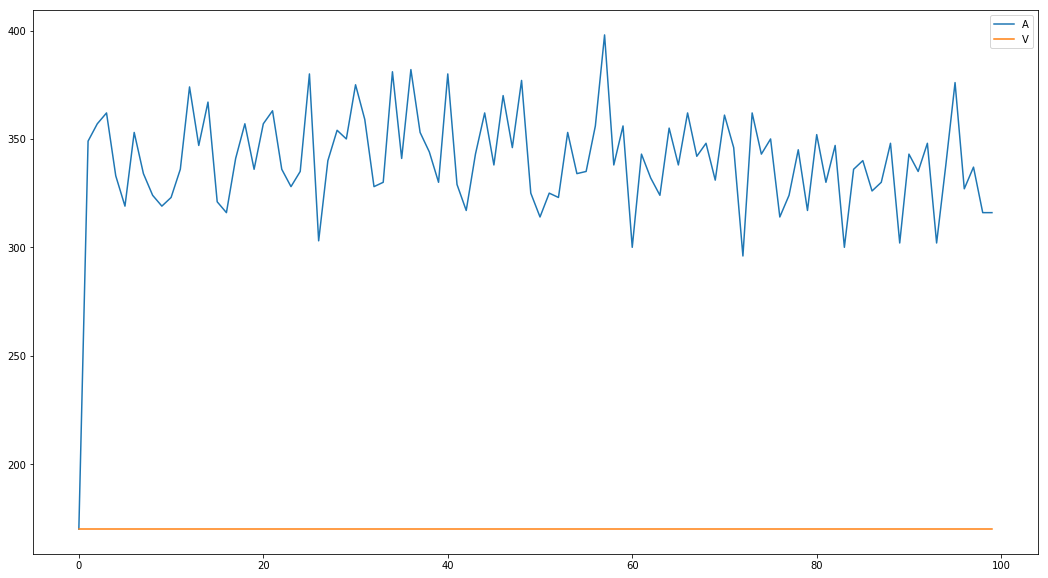

In [14]:
plt.figure(figsize=(18,10))
plt.plot(results1['time'], results1['A'], label='A')
plt.plot(results1['time'], results1['V'], label='V')
plt.legend(loc='best')

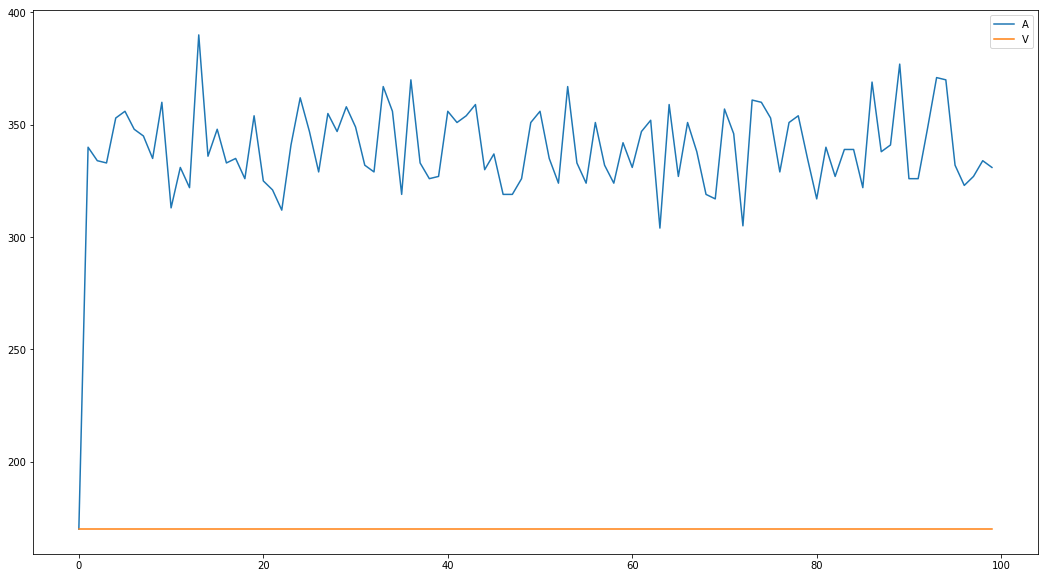

In [15]:
plt.figure(figsize=(18,10))
plt.plot(results2['time'], results2['A'], label='A')
plt.plot(results2['time'], results2['V'], label='V')
plt.legend(loc='best')

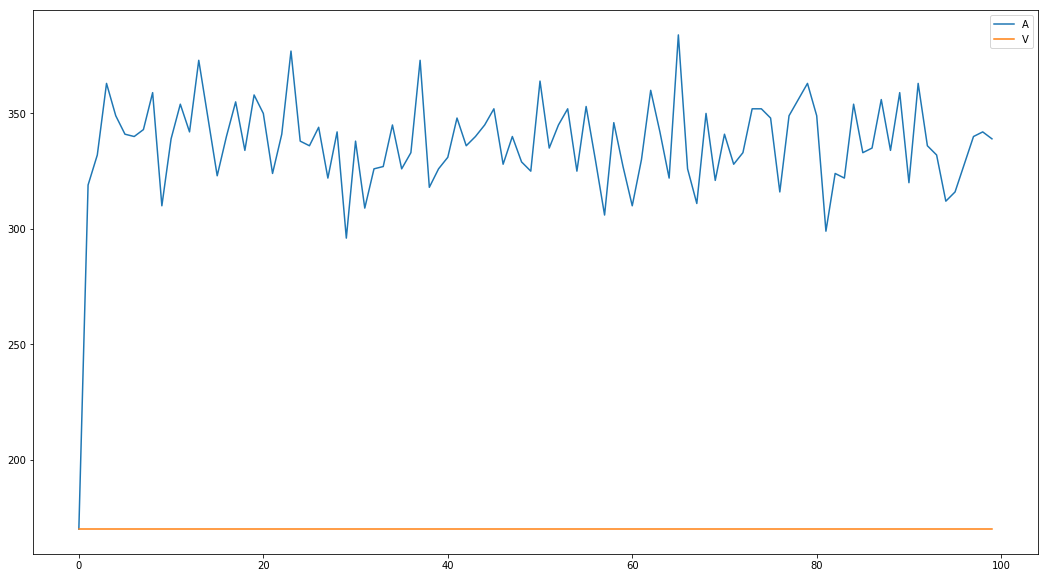

In [16]:
plt.figure(figsize=(18,10))
plt.plot(results3['time'], results3['A'], label='A')
plt.plot(results3['time'], results3['V'], label='V')
plt.legend(loc='best')

In [14]:
v_range = range(1, 500)
def run_test(solver, v_range):
    run_data = []
    for n in v_range:
        model = SimpleHybridModel(init_v=n)
        time_start = time.perf_counter()
        model.run(solver=solver, show_labels=True)
        time_end = time.perf_counter()
        run_data.append(time_end-time_start)
    return run_data

In [15]:
timing_data = {'basic':[], 'tau':[], 'hybrid_tau':[]}
%time timing_data['basic'] = run_test(BasicSSASolver(), v_range)
%time timing_data['tau'] = run_test(BasicTauLeapingSolver(), v_range)
%time timing_data['hybrid_tau'] = run_test(BasicTauHybridSolver(), v_range)
print(timing_data)

Wall time: 7min 59s
Wall time: 2min 18s
Wall time: 4min 55s
{'tau': [7.200703657465738, 7.417861260183599, 7.2203226106494185, 7.7697318063242164, 7.212854676727829, 7.319574067926851, 7.296470107357663, 7.36870934406943, 7.390596026716139, 7.293043553205507, 7.263808403100256, 7.337746623579051, 7.318300043434419, 7.357997042351826, 7.257010761368292, 9.630930549878485, 4.8754869325023265, 4.579315491301713, 4.508378012368212, 4.696678491001876], 'hybrid_tau': [14.8292824246912, 14.584358682694528, 14.651770194312121, 14.597750019840078, 14.645365938575424, 14.628605220513691, 14.739815270715326, 14.696275291690199, 14.696396038150624, 14.661867243746656, 14.663035881752194, 15.463740648549447, 14.823565954447531, 15.168943071670355, 14.908972955352738, 14.927503057061358, 14.81099168257424, 14.78157178611741, 14.821164251879509, 14.838243262731567], 'basic': [15.191647246255343, 15.229745527900945, 15.400583849670284, 20.128062074774107, 24.623137496512072, 24.917920993414782, 24.959

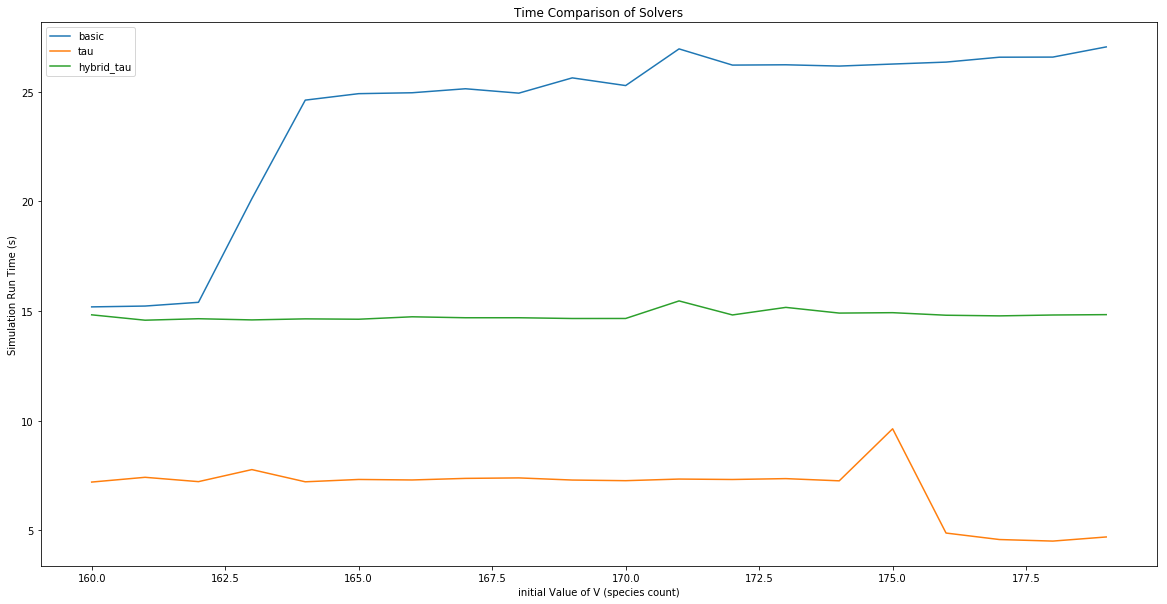

In [16]:
plt.figure(figsize=(20,10))
plt.title("Time Comparison of Solvers")
plt.xlabel("initial Value of V (species count)")
plt.ylabel("Simulation Run Time (s)")
plt.plot(v_range, timing_data['basic'], label='basic')
plt.plot(v_range, timing_data['tau'], label='tau')
plt.plot(v_range, timing_data['hybrid_tau'], label='hybrid_tau')
plt.legend(loc='best')
plt.savefig("TimeComparisonOfSolvers.pdf")

TODO: Put units on axes.  Run speed test until Hybrid crosses SSA.  Perform accuracy test. Lint. Document. Accuracy validation against stoch kit.  Plot of epsilon vs ks-distance (error margin). Find good accuracy testing model.  see what others are doing for accuracy testing.  Ask Brian for polarization model. move seaborn to plotting function.